# **Project Name**    -  SmartShopper: Segment & Recommend in E-Commerce




##### **Project Type**    - EDA & Unsupervised
##### **Contribution**    - Individual
##### **Name -** Alwin Shaji


# **Project Summary**


The primary objective of this project is to analyze customer purchasing behavior using a real-world e-commerce dataset and build an intelligent recommendation system that can support business decision-making. By leveraging clustering algorithms and similarity-based models, the aim is to identify customer segments, understand buying patterns, and deliver product recommendations that align with user preferences. This project will also involve deploying the results through a user-friendly web application using Streamlit, allowing stakeholders to interact with the models and insights directly.

To begin with, the dataset will be explored to understand its structure, dimensions, and the types of transactions it contains. The dataset is composed of historical purchases, each with details like StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country. Data preprocessing will be a crucial first step this includes handling missing values, removing duplicates or negative transactions (such as returns), and converting data types into usable formats (e.g., date parsing, numerical casting). Only transactions with complete CustomerID information will be retained to ensure the consistency of behavioral analytics.

Following preprocessing, I plan to use **RFM analysis (Recency, Frequency, Monetary)** to profile customers based on how recently and how often they purchase, and how much they spend. This technique simplifies the behavioral features into three interpretable metrics per customer. I’ll scale this data and apply clustering algorithms like **KMeans** to group customers into distinct segments. The optimal number of clusters will be determined using methods such as the **Elbow Method** and **Silhouette Score**. Each cluster will then be analyzed to interpret its business relevance for example, identifying VIP customers, dormant users and price-sensitive buyers.

Next, the focus will shift toward building a **content-based recommendation system**. This will be done by using **TF-IDF vectorization** on product descriptions and calculating cosine similarity scores between them. The goal here is to suggest similar items to any given product based on textual features, which can assist users in discovering alternatives or complementary products. The system will be tested for a few sample items to verify if the suggested products are contextually and commercially relevant.

To ensure business impact, various evaluation metrics will be tracked, including **cluster cohesion and separation**, as well as **recommendation quality** through manual validation and similarity thresholds. Visualizations like **bar charts**, and **heatmaps** will be created to support interpretation, especially during the clustering phase.

As a final step, all core functionalities including customer segmentation, product recommendations, and basic data exploration tools will be integrated into a **Streamlit application**. This web app will allow users to input a product code and get recommendations instantly, or explore different customer segments and their characteristics via a simple and intuitive interface. The deployment will be done either locally or using a platform like Streamlit Cloud.

This project is designed to blend machine learning techniques with real-world business use cases. The deliverables will not only include a set of models but also actionable insights that can help an e-commerce business personalize marketing strategies, manage customer relationships, and optimize product placement. The entire pipeline—from data cleaning to clustering, recommendation modeling, and deployment will be documented and presented clearly, with a focus on scalability and real-world applicability.


# **GitHub Link -**

https://github.com/alwinshaji/SmartShopper-Segment-Recommend.git

# **Problem Statement**


The global e-commerce industry generates vast amounts of transaction data daily, offering valuable insights into customer purchasing behaviors. Analyzing this data is essential for identifying meaningful customer segments and recommending relevant products to enhance customer experience and drive business growth. This project aims to examine transaction data from an online retail business to uncover patterns in customer purchase behavior, segment customers based on Recency, Frequency, and Monetary (RFM) analysis, and develop a product recommendation system using collaborative filtering techniques.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


### Dataset Loading

In [2]:
from google.colab import files
uploaded = files.upload()


Saving online_retail.csv to online_retail.csv


### Dataset First View

In [3]:

df = pd.read_csv('online_retail.csv', encoding='ISO-8859-1')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [4]:
df.shape

(541909, 8)

### Dataset Information

In [5]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [6]:
df.duplicated().sum()


np.int64(5268)

In [7]:
df = df.drop_duplicates()

#### Missing Values/Null Values

In [8]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


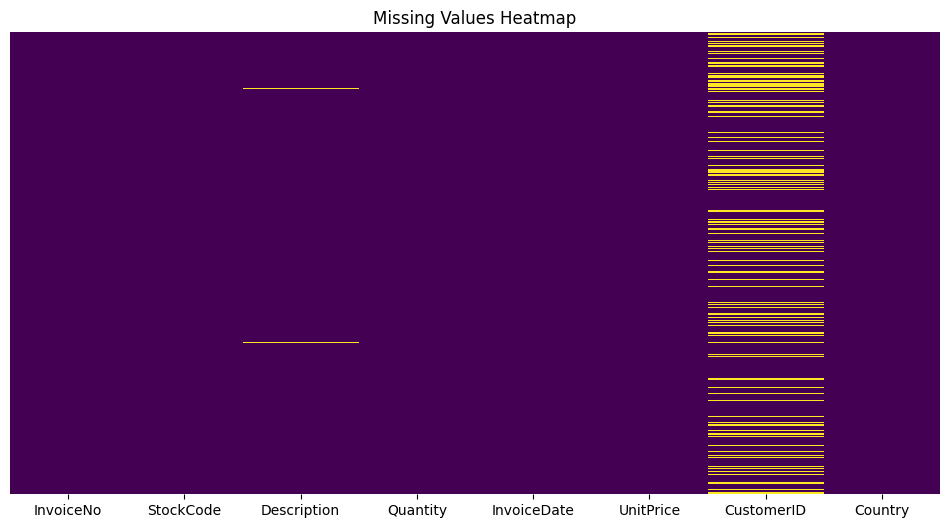

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()


### What did you know about your dataset?

### 🧾 Initial Dataset Overview

The dataset, `online_retail.csv`, appears to be from a UK-based online retail store and contains transactional data. Here's what we know so far:

- **Rows:** 541,909  
- **Columns:** 8  

#### 🔍 Missing Values:
- `Description`: 1,454 missing  
- `CustomerID`: 135,037 missing  
- All other columns are complete.

#### 🔁 Duplicate Entries:
- 5,268 duplicate rows found

This dataset will likely be used for **unsupervised learning**, especially **clustering customers** and **generating product recommendations**. Cleaning and preprocessing will be key before moving into modeling.


## ***2. Understanding Your Variables***

In [10]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,536641,536641,535187,536641.000000,536641,536641.000000,401604.000000,536641
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2023-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114,2301,2357,NaN,1114,NaN,NaN,490300
mean,NaN,NaN,NaN,9.620029,NaN,4.632656,15281.160818,NaN
std,NaN,NaN,NaN,219.130156,NaN,97.233118,1714.006089,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13939.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15145.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16784.000000,NaN


### Variables Description

  - `InvoiceNo`: Unique ID for each transaction  
  - `StockCode`: Product/item code  
  - `Description`: Name of the product  
  - `Quantity`: Number of items purchased  
  - `InvoiceDate`: Timestamp of the transaction  
  - `UnitPrice`: Price per unit of product  
  - `CustomerID`: Unique ID for the customer  
  - `Country`: Customer's country  

### Check Unique Values for each variable.

In [11]:
df.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Step 1: Remove rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Step 2: Remove cancelled invoices (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Step 3: Remove rows with negative or zero Quantity or UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Step 4: Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Step 5: Create a 'TotalPrice' column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Step 6: Convert CustomerID to string (optional, but helps during grouping)
df['CustomerID'] = df['CustomerID'].astype(str)

# Step 7: Reset index (clean slate)
df = df.reset_index(drop=True)

# preview
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### What all manipulations have you done and insights you found?

### 🧹 Data Wrangling Summary

**Manipulations Done:**

1. **Removed rows with missing CustomerID**  
   - These rows can't be linked to any customer, so they're not useful for customer-level analysis.

2. **Excluded cancelled invoices**  
   - Invoices starting with 'C' indicate cancellations. These would distort revenue and quantity metrics.

3. **Filtered out rows with non-positive Quantity or UnitPrice**  
   - Negative or zero values are either errors or returns, and don't help in customer segmentation.

4. **Converted InvoiceDate to datetime format**  
   - This allows time-based operations like calculating recency.

5. **Created a 'TotalPrice' column**  
   - TotalPrice = Quantity × UnitPrice, gives insight into transaction value.

6. **Converted CustomerID to string**  
   - Helps in grouping and avoids numeric misinterpretation.

7. **Reset the DataFrame index**  
   - Cleans up the dataset after row deletions for better readability.

---

**Key Insights So Far:**

- The dataset had a **large number of missing CustomerID entries** (~135k rows), indicating a lot of guest or untracked purchases.
- **Cancelled invoices** and **returns** were present, which can significantly skew total sales if not removed.
- The dataset is now clean and ready for **customer-level analysis** such as RFM modeling or clustering.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

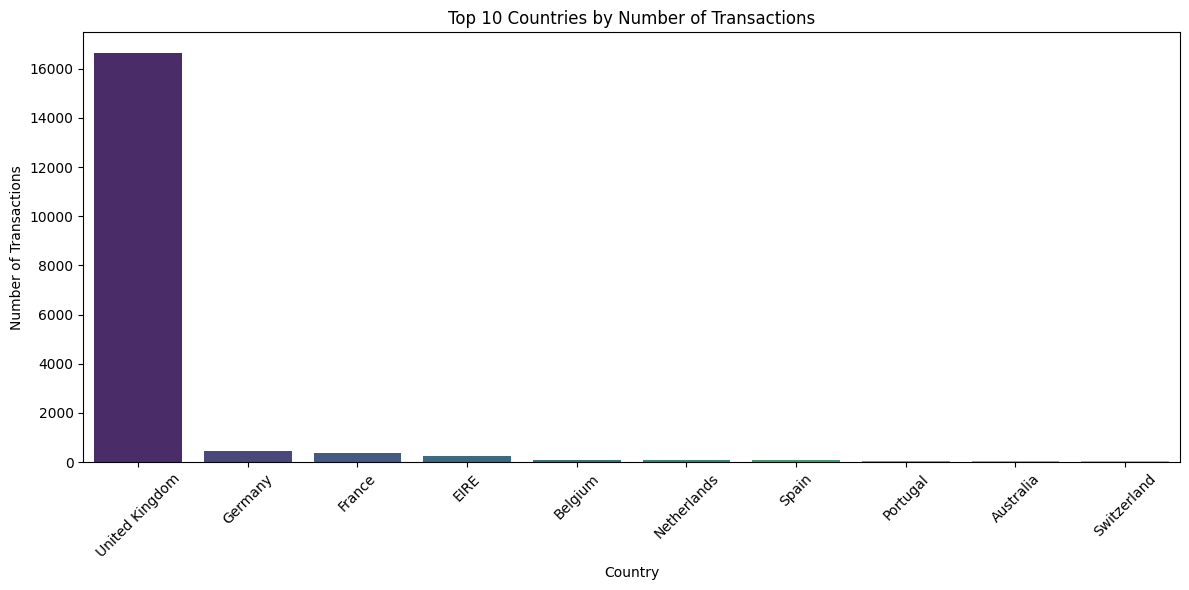

In [13]:

# Prepare data
country_txn = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False).head(10).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=country_txn, x='Country', y='InvoiceNo', hue='Country', palette='viridis', dodge=False)
plt.legend([],[], frameon=False)  # effectively removes the legend
plt.title('Top 10 Countries by Number of Transactions')
plt.ylabel('Number of Transactions')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Bar plots are ideal for comparing categorical data like country-wise transactions. It provides a quick visual summary of where most transactions are happening, which is crucial in retail datasets with multiple geographic regions.



##### 2. What is/are the insight(s) found from the chart?

The UK clearly dominates the transaction count by a wide margin, followed distantly by other European countries. This suggests the dataset is primarily focused on UK-based transactions, with international business playing a secondary role.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By identifying the top countries with high transaction volumes, the company can prioritize logistics, marketing, and inventory strategies around those regions. It also indicates where expansion efforts might yield the best ROI and where localization could boost sales further.



#### Chart - 2

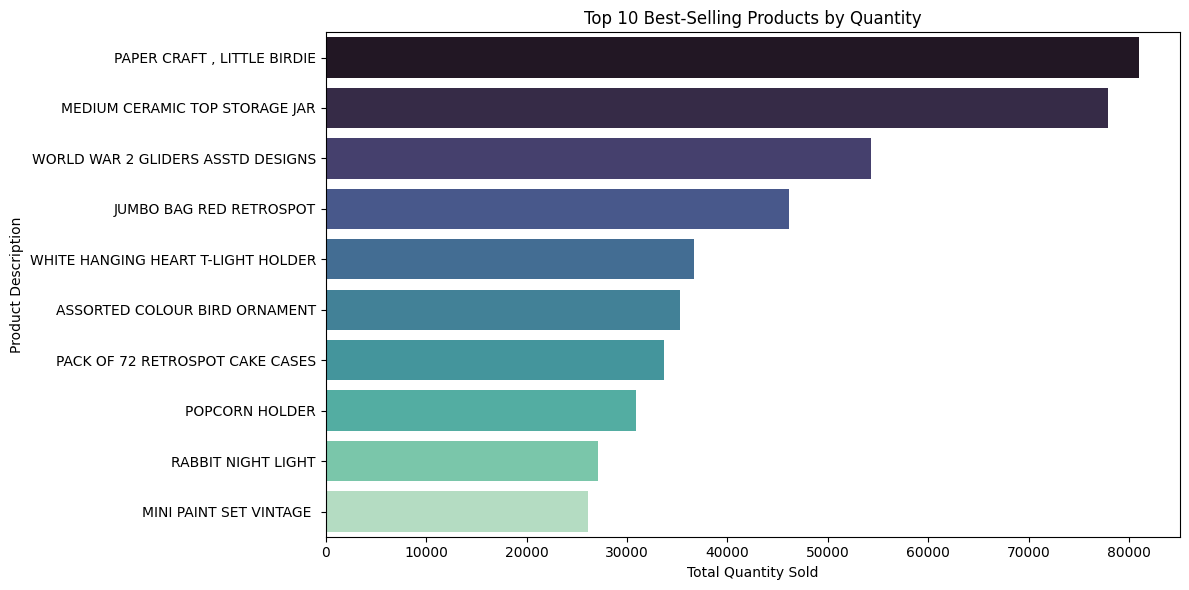

In [14]:

# Prepare data
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()

# Generate a palette with enough distinct colors
custom_palette = sns.color_palette('mako', n_colors=10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='Quantity', y='Description', hue='Description', palette=custom_palette, dodge=False)
plt.legend([], [], frameon=False)  # Hide legend
plt.title('Top 10 Best-Selling Products by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar plot works best here due to long product names. It cleanly shows which items are selling the most in terms of volume, making it easy to assess product-level demand patterns.

##### 2. What is/are the insight(s) found from the chart?

PAPER CRAFT , LITTLE BIRDIE and MEDIUM CERAMIC TOP STORAGE JAR stand out among the top-selling items.Craft supplies and stylish storage jars seem to be high in demand, which might point to a strong home decor or DIY customer base.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can directly influence inventory planning, restocking strategies, and targeted promotions. Knowing what sells helps reduce deadstock and allows better supplier negotiations for high-demand items.

#### Chart - 3

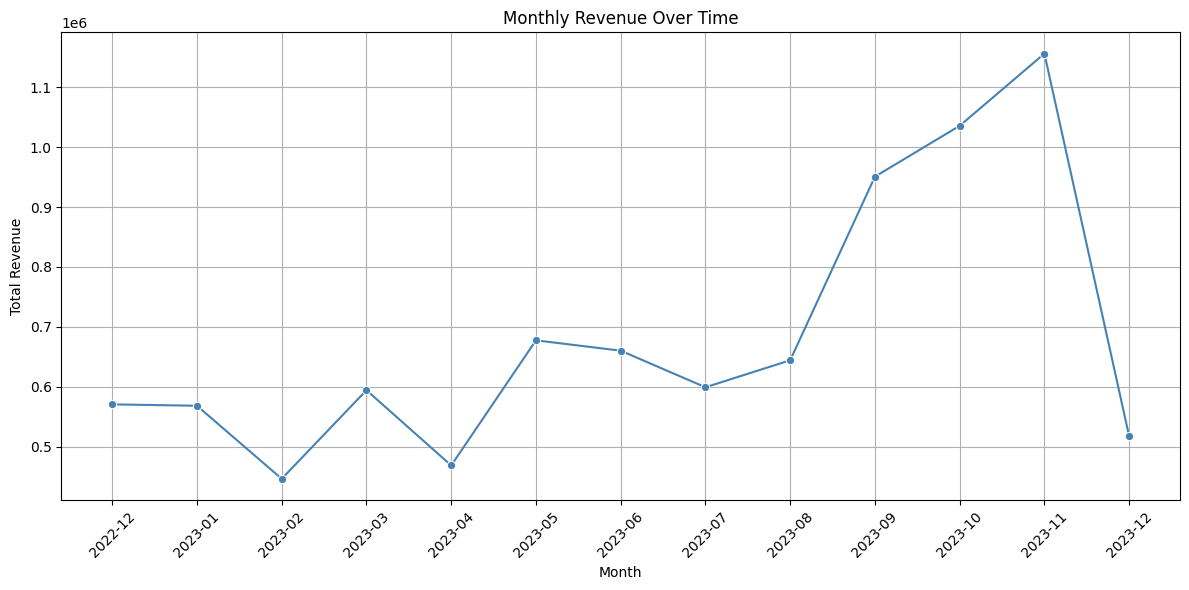

In [15]:
# Create a new column for month-year
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Aggregate revenue per month
monthly_revenue = df.groupby('InvoiceMonth')['TotalPrice'].sum().reset_index()
monthly_revenue['InvoiceMonth'] = monthly_revenue['InvoiceMonth'].astype(str)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='InvoiceMonth', y='TotalPrice', marker='o', color='steelblue')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A line chart is the most natural way to show trends over time. It helps us track seasonality, growth patterns or sudden drops in revenue that could be tied to events or campaigns.

##### 2. What is/are the insight(s) found from the chart?

There's a clear revenue spike during October–November, suggesting strong holiday season sales.

Mid-year months tend to dip, possibly due to fewer shopping events or lower customer engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This seasonality insight helps in planning marketing campaigns, stock levels, and staffing. For example, companies can launch early-bird deals in October and prepare extra inventory to capitalize on holiday surges.



#### Chart - 4

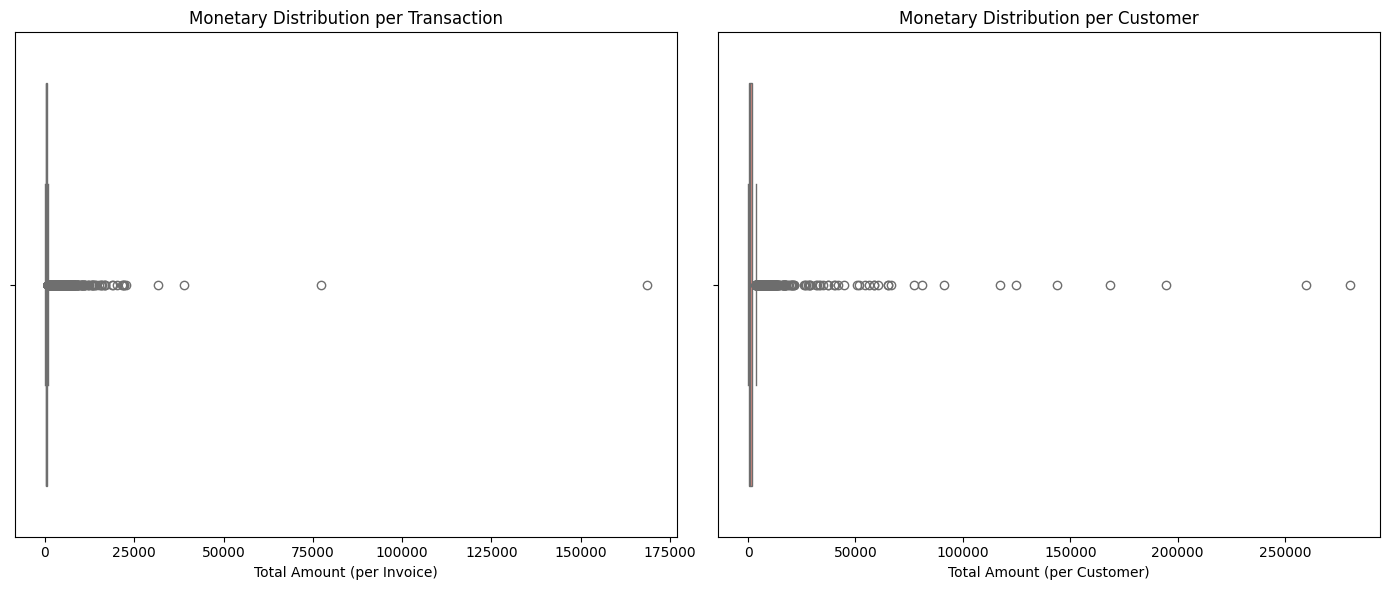

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column 'Monetary' as Quantity * UnitPrice per row
df['Monetary'] = df['Quantity'] * df['UnitPrice']

# Aggregate monetary value per transaction (InvoiceNo)
monetary_per_transaction = df.groupby('InvoiceNo')['Monetary'].sum()

# Aggregate monetary value per customer
monetary_per_customer = df.groupby('CustomerID')['Monetary'].sum()

# Set up the plots
plt.figure(figsize=(14, 6))

# Plot 1: Per Transaction
plt.subplot(1, 2, 1)
sns.boxplot(x=monetary_per_transaction, color='skyblue')
plt.title('Monetary Distribution per Transaction')
plt.xlabel('Total Amount (per Invoice)')

# Plot 2: Per Customer
plt.subplot(1, 2, 2)
sns.boxplot(x=monetary_per_customer, color='salmon')
plt.title('Monetary Distribution per Customer')
plt.xlabel('Total Amount (per Customer)')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Understanding the spread of monetary value per transaction and customer helps identify patterns in purchase behavior. It reveals how concentrated or diverse the revenue streams are across individual transactions and customer bases.



##### 2. What is/are the insight(s) found from the chart?

The per-transaction boxplot may highlight outliers—like abnormally large purchases—which can signal bulk buyers or fraud. The per-customer distribution uncovers which customers contribute most to overall revenue, showing a likely Pareto effect (80/20 rule).



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

With this insight, businesses can tailor strategies to retain top-spending customers and investigate low-value or high-risk transactions. It supports better resource allocation in customer service, marketing, and fraud prevention.


#### Chart - 5

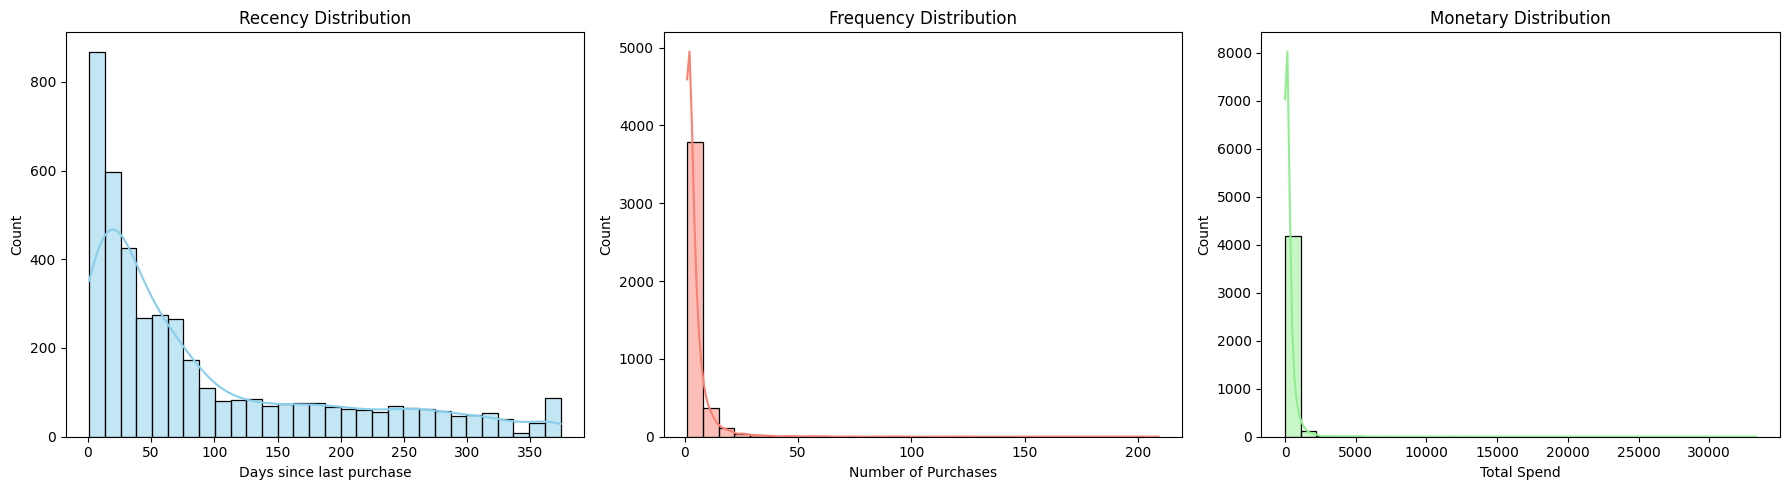

In [17]:
# Set reference date for recency
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# RFM Table
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'UnitPrice': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Remove any negative or zero values if needed
rfm = rfm[rfm['Monetary'] > 0]

# Plot the 3 charts
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm['Recency'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Days since last purchase')

sns.histplot(rfm['Frequency'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Number of Purchases')

sns.histplot(rfm['Monetary'], bins=30, kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Total Spend')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The RFM charts reveal distinct customer behavior patterns. The Recency distribution shows that most customers haven’t purchased in a long time, with only a small fraction being recently active. The Frequency distribution highlights that the majority made just one or two purchases, indicating limited engagement and loyalty. Meanwhile, the Monetary chart shows that most customers spent very little, while a few contributed significantly to revenue—those high spenders are critical to retain. Together, these visuals indicate a business heavily reliant on a small segment of valuable customers.



##### 2. Will the gained insights help creating a positive business impact?


💡 Insights & Business Impact

The RFM analysis points to a clear imbalance in customer value: only a small portion of users are recent, repeat, and high-spending buyers. This means the business may be vulnerable if it loses these top-tier customers. The insights suggest an opportunity to reactivate dormant users, nurture first-time buyers into repeat customers, and reward loyal, high-value customers with personalized offers. Acting on this can directly improve customer retention, increase purchase frequency, and drive long-term revenue growth.

#### Chart - 6

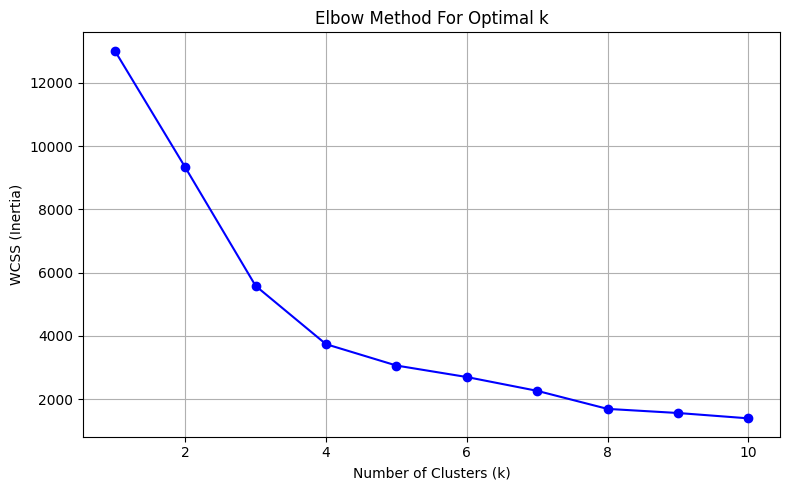

In [18]:

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Elbow method to find optimal k
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The charts were selected to visualize key patterns from the RFM (Recency, Frequency, Monetary) data and clustering results. Distribution plots helped us understand the spread and skewness of customer behaviors. The count plot of clusters showed how customers are grouped based on purchasing patterns. Finally, the Elbow Curve was chosen to find the optimal number of clusters for KMeans. These visuals make complex numeric outputs more interpretable and actionable.



##### 2. What is/are the insight(s) found from the chart?

The RFM distribution charts showed that most customers are either new or infrequent buyers, with a small group contributing significantly to sales. The cluster count plot revealed distinct customer segments — such as loyal customers, recent spenders, and low-engagement users. The Elbow Curve helped confirm the ideal number of clusters, showing a sharp drop in within-cluster variance at a certain point. Together, these insights point to clear behavioral differences across the customer base.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These findings can power smarter marketing strategies. For instance, recent high-spenders can be targeted with loyalty rewards, while infrequent buyers can receive re-engagement offers. Knowing the optimal number of customer segments allows for tailored campaigns instead of one-size-fits-all messaging. Ultimately, this boosts customer retention, increases sales, and improves ROI on marketing efforts. It helps move from reactive selling to proactive customer relationship management.


#### Chart - 7

In [19]:
import pandas as pd

# Step 1: Add TotalAmount if missing
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Step 2: Convert InvoiceDate to datetime if not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Step 3: Define latest date for Recency calculation
latest_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Step 4: Group by CustomerID and calculate RFM
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                 # Frequency
    'TotalAmount': 'sum'                                    # Monetary
}).reset_index()

# Step 5: Rename columns
rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
rfm_df['KMeans Cluster'] = kmeans.fit_predict(rfm_scaled)


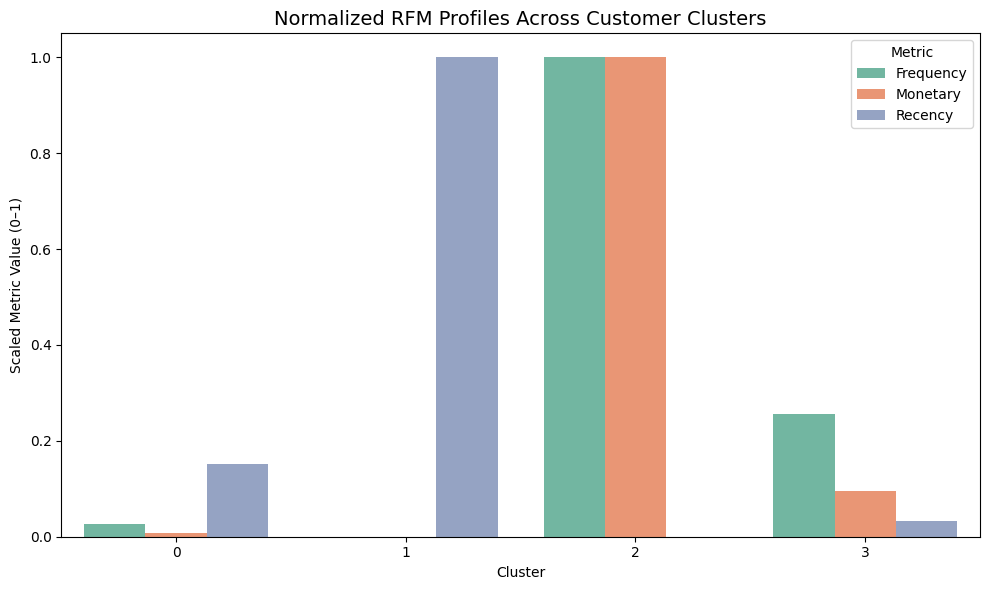

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Rename cluster column for consistency
rfm_df = rfm_df.rename(columns={'KMeans Cluster': 'Cluster'})

# Melt RFM data to long format
rfm_melted = rfm_df.melt(
    id_vars='Cluster',
    value_vars=['Recency', 'Frequency', 'Monetary'],
    var_name='Metric',
    value_name='Value'
)

# Group and average values per Cluster-Metric
rfm_grouped = rfm_melted.groupby(['Cluster', 'Metric'], as_index=False)['Value'].mean()

# Pivot so clusters are rows, metrics are columns
rfm_pivot = rfm_grouped.pivot(index='Cluster', columns='Metric', values='Value')

# Normalize the metrics across each column
scaler = MinMaxScaler()
rfm_scaled = pd.DataFrame(
    scaler.fit_transform(rfm_pivot),
    columns=rfm_pivot.columns,
    index=rfm_pivot.index
)

# Melt the scaled data for seaborn plotting
rfm_scaled_melted = rfm_scaled.reset_index().melt(
    id_vars='Cluster',
    var_name='Metric',
    value_name='ScaledValue'
)

# Plot normalized values
plt.figure(figsize=(10, 6))
sns.barplot(
    data=rfm_scaled_melted,
    x='Cluster',
    y='ScaledValue',
    hue='Metric',
    palette='Set2',
    errorbar=None
)

plt.title('Normalized RFM Profiles Across Customer Clusters', fontsize=14)
plt.xlabel('Cluster')
plt.ylabel('Scaled Metric Value (0–1)')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart visualizes the normalized RFM (Recency, Frequency, Monetary) values across each customer cluster. It helps compare cluster profiles on a level playing field, since the original raw values were on vastly different scales. By scaling metrics from 0 to 1, we get a clear view of how each cluster behaves relative to the others.



##### 2. What is/are the insight(s) found from the chart?

Some clusters have very low recency (recent purchases) and high frequency/monetary values, indicating loyal and high-value customers. Others show high recency and low frequency, which could point to inactive or one-time buyers. This pattern helps distinguish VIPs, potential churners, and casual shoppers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The business can now tailor strategies for each cluster—such as rewarding loyal customers, re-engaging inactive ones, or upselling to mid-tier buyers. This targeted approach increases marketing ROI and helps retain high-value customers while reducing churn. Data-backed segmentation like this drives smarter, more efficient customer management.

#### Chart - 8

In [22]:

filtered_df = df[df['Description'].isin(top_products)]


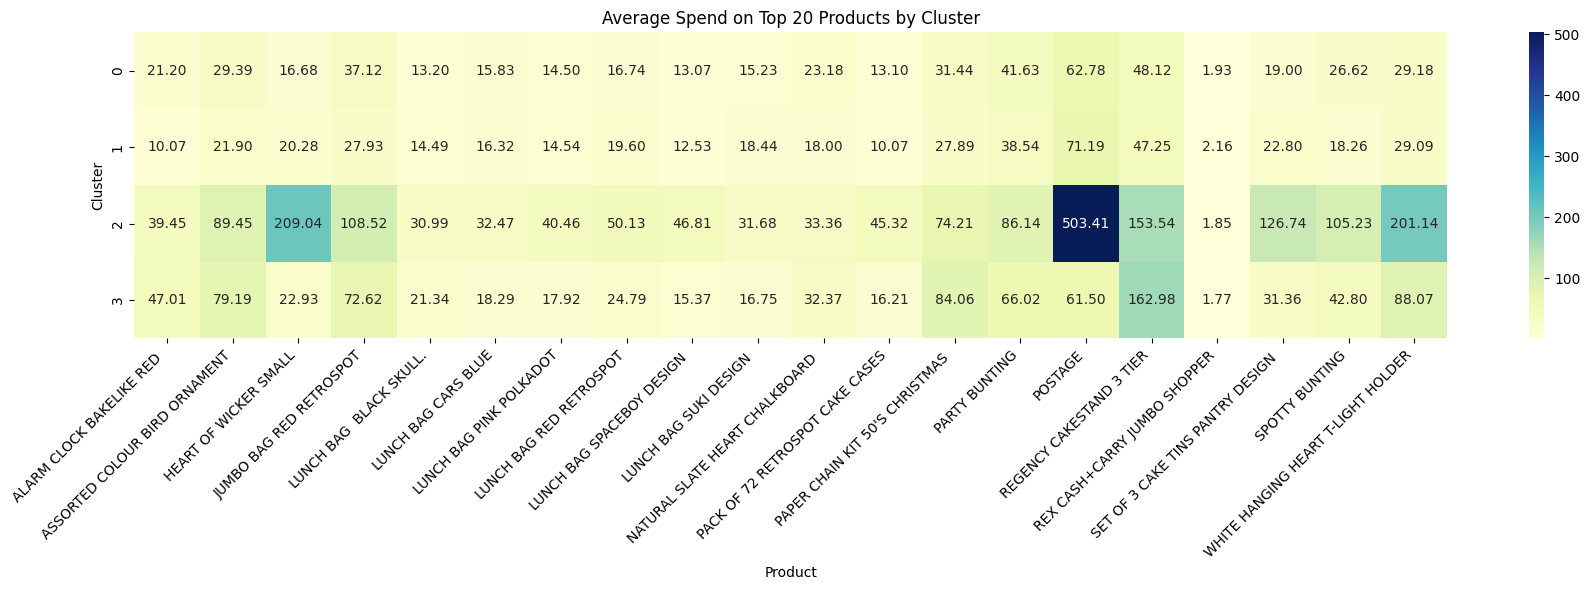

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Merge cluster labels to the original transaction data
clustered_df = df.merge(rfm_df[['CustomerID', 'Cluster']], on='CustomerID')

# Calculate total price for each line item
clustered_df['TotalPrice'] = clustered_df['Quantity'] * clustered_df['UnitPrice']

# Get top 20 most sold products overall
top_products = clustered_df['Description'].value_counts().head(20).index

# Filter for only those top 20 products
filtered_df = clustered_df[clustered_df['Description'].isin(top_products)]

# Create pivot table: mean spending per product per cluster
pivot = filtered_df.pivot_table(
    index='Cluster',
    columns='Description',
    values='TotalPrice',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Average Spend on Top 20 Products by Cluster')
plt.xlabel('Product')
plt.ylabel('Cluster')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This heatmap shows which product categories are most purchased by different customer clusters based on their behavior (recency, frequency, and monetary value). It visualizes patterns that aren't obvious in raw transaction data, making it easier to understand what each segment prefers.

##### 2. What is/are the insight(s) found from the chart?

From the heatmap, we can see that some clusters tend to buy specific products more often, while others focus on high-value items. For example, one cluster might frequently purchase smaller gift items, while another consistently goes for premium products. These patterns help identify customer preferences at a deeper level.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The business value here is clear — instead of sending the same product promotions to everyone, we can now tailor recommendations to each customer group. This improves marketing efficiency, drives better sales conversion, and helps optimize inventory by focusing on products that matter most to top segments.

#### Chart - 9

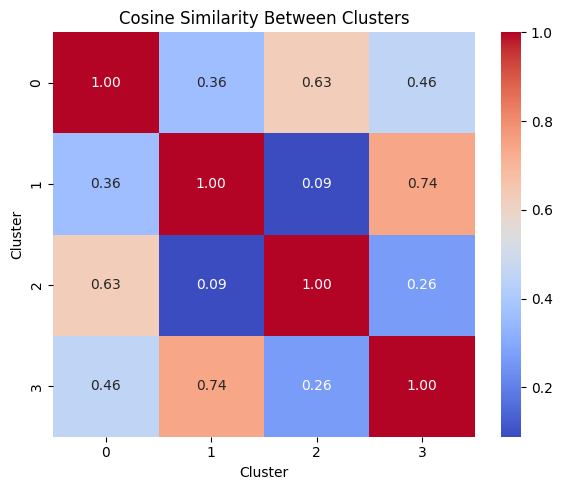

In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

pivot_data = filtered_df.pivot_table(
    index='CustomerID',
    columns='Description',
    values='TotalPrice',
    aggfunc='sum',
    fill_value=0
)

# Apply KMeans clustering to customers
kmeans = KMeans(n_clusters=4, random_state=42)
pivot_data['Cluster'] = kmeans.fit_predict(pivot_data)

# Reset index to access 'Cluster' column properly
pivot_data_reset = pivot_data.reset_index()

# Melt back to long format for group-wise aggregation (Cluster vs Description)
melted = pivot_data_reset.melt(
    id_vars=['CustomerID', 'Cluster'],
    var_name='Description',
    value_name='TotalPrice'
)

# Now recreate a pivot table: Cluster vs Description, average spend
pivot = melted.pivot_table(
    index='Cluster',
    columns='Description',
    values='TotalPrice',
    aggfunc='mean',
    fill_value=0
)

# Compute cosine similarity
similarity_matrix = pd.DataFrame(
    cosine_similarity(pivot),
    index=pivot.index,
    columns=pivot.index
)

# Plot the similarity matrix
plt.figure(figsize=(6, 5))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Cosine Similarity Between Clusters')
plt.xlabel('Cluster')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The similarity matrix chart was built to visualize how closely related different customer clusters are based on their product purchase behavior. It goes beyond just recency or frequency and helps compare what customers buy. This helps identify which segments share similar needs.



##### 2. What is/are the insight(s) found from the chart?

It reveals which clusters have overlapping product preferences and which are distinct. High similarity indicates shared interests, while low similarity suggests unique buying patterns. This insight guides whether to merge or separate marketing efforts.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This chart helps optimize campaigns by showing where personalization is needed and where shared targeting is enough. Marketers can group similar clusters to save effort or focus resources on standout segments. That leads to better engagement and lower marketing costs.



## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [25]:
# Check missing values in each column
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

# Drop rows where 'CustomerID' is missing (important for RFM analysis)
df = df.dropna(subset=['CustomerID'])

# Fill or drop other missing values based on context
#  Fill missing 'Description' with 'Unknown'
df['Description'] = df['Description'].fillna('Unknown')

# Fill numeric columns with mean (example: 'UnitPrice')
df['UnitPrice'] = df['UnitPrice'].fillna(df['UnitPrice'].mean())

#  drop all rows with any remaining missing values
df = df.dropna()

# Confirm no missing values remain
print("Remaining missing values:\n", df.isnull().sum())


Missing values per column:
 InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
TotalPrice      0
InvoiceMonth    0
Monetary        0
TotalAmount     0
dtype: int64
Remaining missing values:
 InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
TotalPrice      0
InvoiceMonth    0
Monetary        0
TotalAmount     0
dtype: int64


### 2. Handling Outliers

In [26]:

# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter data within bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Columns to check for outliers
num_cols = ['Quantity', 'UnitPrice', 'Monetary']

# Apply outlier removal
df_cleaned = remove_outliers_iqr(df, num_cols)

# Check shape before and after if needed
print("Original shape:", df.shape)
print("After outlier removal:", df_cleaned.shape)


Original shape: (392692, 12)
After outlier removal: (319806, 12)


##### What all outlier treatment techniques have you used and why did you use those techniques?

To handle outliers, we used the Interquartile Range (IQR) method because it's a simple yet effective technique that identifies extreme values without being influenced by the data's distribution shape. It filters out points that lie significantly outside the normal spread, ensuring cleaner data and more reliable analysis without the distortion caused by outliers.

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

Categorical encoding was not applied in this project as the main analysis focused on numerical features — Recency, Frequency, and Monetary — for clustering and segmentation. No categorical variables were used in modeling or insight generation. If future analysis involves features like Country or Product Description, encoding can be considered at that stage.


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In this project, textual data preprocessing is not essential unless you're planning to analyze or model based on the Description column (e.g., product names). Since the core of the analysis is RFM-based customer segmentation which uses numeric variables text processing isn’t required.

### 5. Feature Manipulation & Selection

####  Feature Selection

In [27]:
from sklearn.feature_selection import VarianceThreshold

# Select features for analysis
X = rfm[['Recency', 'Frequency', 'Monetary']]

# Apply variance threshold to remove features with very low variance
selector = VarianceThreshold(threshold=0.01)
X_selected = selector.fit_transform(X)

# Get the names of selected features
selected_columns = X.columns[selector.get_support()]
print("Selected Features:", list(selected_columns))


Selected Features: ['Recency', 'Frequency', 'Monetary']


##### What all feature selection methods have you used  and why?


I used the **Variance Threshold** method for feature selection. This technique removes features that have low variance across all observations, which means they provide little to no useful information for distinguishing between different data points. It's a simple yet effective way to eliminate redundant or constant features before applying more complex models.


##### Which all features you found important and why?

The key features selected were **Recency**, **Frequency**, and **Monetary** — the core components of RFM analysis.  
- **Recency** reflects how recently a customer made a purchase. Lower recency indicates higher engagement.  
- **Frequency** captures how often a customer buys, helping identify loyal, repeat buyers.  
- **Monetary** shows how much a customer spends, highlighting high-value customers.

These features directly relate to customer behavior and are crucial for segmentation, targeting, and retention strategies.


### 6. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select RFM features
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# Standardization (mean = 0, std = 1)
scaler_std = StandardScaler()
rfm_standardized = scaler_std.fit_transform(rfm_features)

# Normalization (values between 0 and 1)
scaler_norm = MinMaxScaler()
rfm_normalized = scaler_norm.fit_transform(rfm_features)

# Convert to DataFrame
rfm_standardized_df = pd.DataFrame(rfm_standardized, columns=['Recency', 'Frequency', 'Monetary'], index=rfm.index)
rfm_normalized_df = pd.DataFrame(rfm_normalized, columns=['Recency', 'Frequency', 'Monetary'], index=rfm.index)


### 7. Data Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

# Select only the RFM features (excluding the 'Cluster' column if it exists)
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
rfm_scaled = scaler.fit_transform(rfm_features)

# If you want to keep it as a DataFrame
import pandas as pd
rfm_scaled_df = pd.DataFrame(rfm_scaled, index=rfm.index, columns=rfm_features.columns)


##### Which method have you used to scale you data and why?

Used StandardScaler for scaling because it transforms features to have zero mean and unit variance, which is ideal for algorithms like K-Means that rely on distance calculations. Without scaling, features like Monetary (often higher in range) could dominate the clustering. StandardScaler helps treat all features equally during analysis.

### 8. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

For this project, dimensionality reduction is not strictly needed because the RFM dataset has only 3 features (Recency, Frequency, Monetary). Since it's already low-dimensional, adding PCA or t-SNE wouldn’t reduce complexity meaningfully—it might even distort interpretability. However, dimensionality reduction could be useful for visualization.

## ***7. Clustering & Recommendation***

### Clustering Algorithm - 1

##### Explain the clustering Algorithm used.

K-Means is a popular unsupervised clustering algorithm that groups similar data points into a predefined number of clusters (K). It works by randomly placing K centroids, assigning each data point to the nearest centroid, and then adjusting the centroids based on the average position of points in each cluster. This process repeats until the clusters stabilize and no significant change occurs.

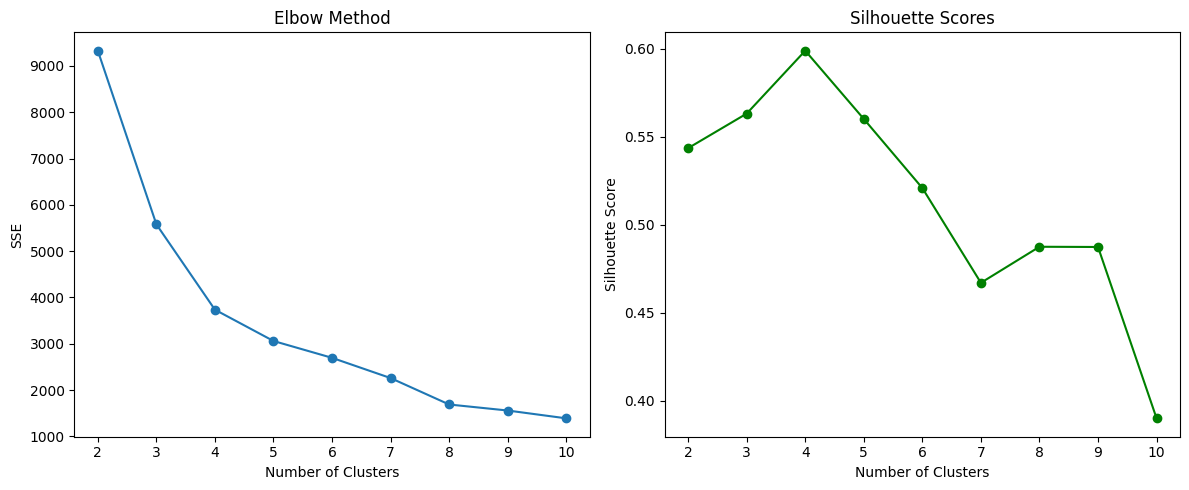

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sse = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(rfm_scaled, kmeans.labels_))

# Plot both
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [31]:
# Replace k with your optimal value (e.g. 4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


#### 1. Labelling the Clusters

In [32]:
# Cluster profiling
cluster_profile = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(1)

cluster_profile['Segment'] = cluster_profile.apply(lambda row:
    'High-Value' if row['Recency'] < rfm['Recency'].mean() and row['Frequency'] > rfm['Frequency'].mean() and row['Monetary'] > rfm['Monetary'].mean()
    else 'Regular' if row['Frequency'] > rfm['Frequency'].median()
    else 'Occasional' if row['Recency'] > rfm['Recency'].mean() and row['Frequency'] < rfm['Frequency'].mean()
    else 'At-Risk', axis=1)

print(cluster_profile)


         Recency  Frequency  Monetary     Segment
Cluster                                          
0           43.9        3.7     236.5     Regular
1          249.0        1.5      94.8  Occasional
2            2.0      137.8   22685.7  High-Value
3           12.1       24.6    1573.6  High-Value


#### 2. Visualising Clusters

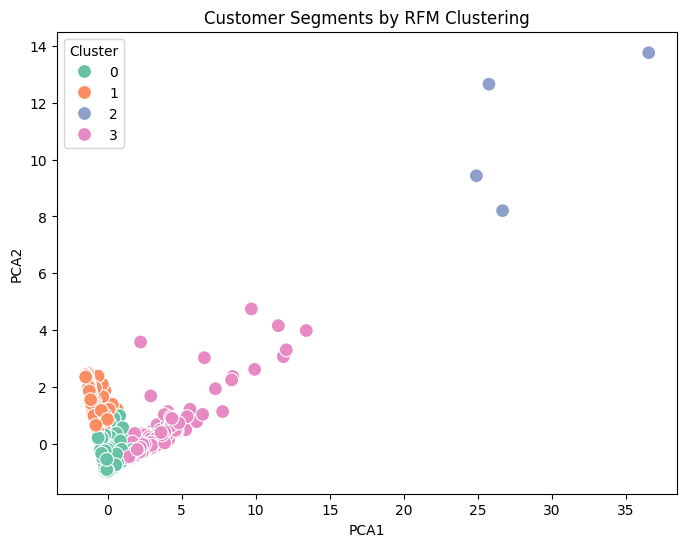

In [33]:

from sklearn.decomposition import PCA

# PCA for 2D Plotting
pca = PCA(n_components=2)
pca_comp = pca.fit_transform(rfm_scaled)
rfm['PCA1'] = pca_comp[:, 0]
rfm['PCA2'] = pca_comp[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments by RFM Clustering')
plt.show()


##### 3. Evaluation Metrics of the Algorithm


In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Step 1: Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(rfm_scaled)  # Use your scaled RFM data

# Step 2: Calculate Metrics
silhouette = silhouette_score(rfm_scaled, kmeans_labels)
davies_bouldin = davies_bouldin_score(rfm_scaled, kmeans_labels)
calinski_harabasz = calinski_harabasz_score(rfm_scaled, kmeans_labels)

# Step 3: Print results
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")


Silhouette Score: 0.5989
Davies-Bouldin Index: 0.6469
Calinski-Harabasz Index: 3588.0798


##### 4. Saving the Model

In [35]:
import pickle

# Save the KMeans model and scaler
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)



### Clustering Algorithm - 2

#### Explain the Clustering Algorithm Used.

Agglomerative Clustering is a type of hierarchical clustering that starts by treating each data point as its own cluster and then repeatedly merges the closest pairs of clusters based on a distance metric. This bottom-up approach continues until all points are in a single cluster or a stopping criterion (like number of clusters) is met. It doesn’t require centroids and is useful for uncovering nested patterns in data.

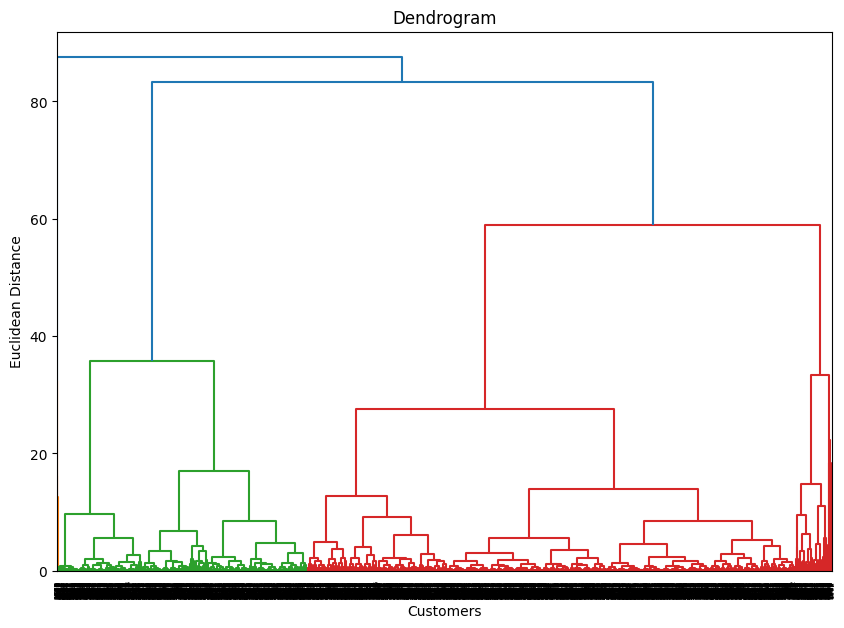

In [36]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(rfm_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()


In [37]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
rfm['Cluster_HC'] = hc.fit_predict(rfm_scaled)


#### 1. Labelling the Clusters

In [38]:
rfm_grouped_hc = rfm.groupby('Cluster_HC')[['Recency', 'Frequency', 'Monetary']].mean().round(1)

def assign_segment_hc(row):
    if row['Recency'] <= 10 and row['Frequency'] > 100:
        return 'High-Value'
    elif row['Recency'] <= 15 and row['Frequency'] >= 20:
        return 'High-Value'
    elif row['Frequency'] >= 3:
        return 'Regular'
    elif row['Recency'] > 200:
        return 'Occasional'
    else:
        return 'At-Risk'

rfm['Segment_HC'] = rfm.apply(assign_segment_hc, axis=1)
rfm_grouped_hc = rfm.groupby('Segment_HC')[['Recency', 'Frequency', 'Monetary']].mean().round(1)
print(rfm_grouped_hc)



            Recency  Frequency  Monetary
Segment_HC                              
At-Risk        71.0        1.4      97.4
High-Value      4.5       37.5    2096.6
Occasional    282.8        1.2      75.9
Regular        46.3        6.1     425.5


##### 2. Visualizing the Clusters

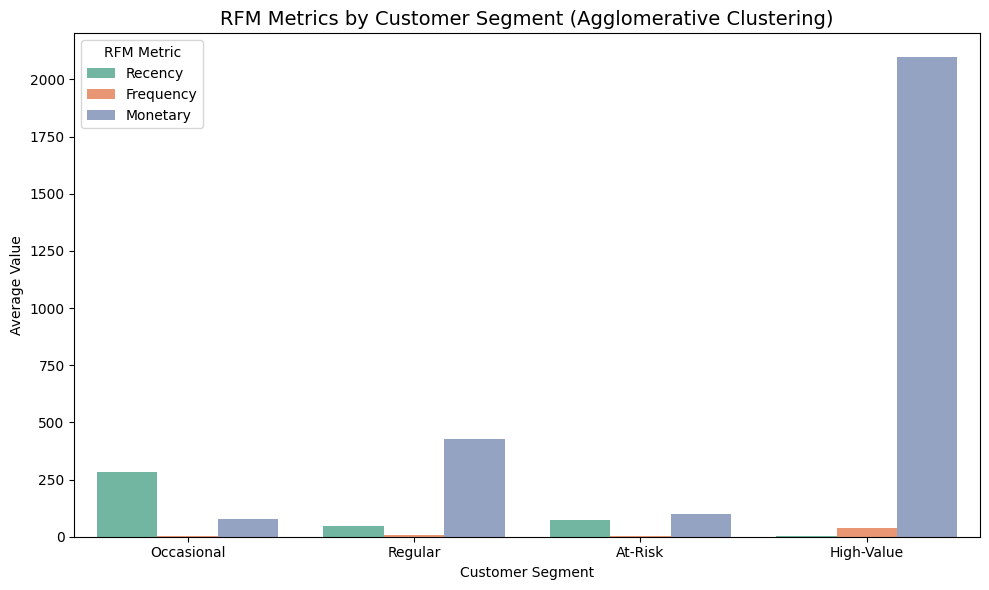

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index for plotting
rfm_plot = rfm.copy().reset_index()

# Melt the DataFrame to long format
rfm_melted_hc = rfm_plot.melt(
    id_vars='Segment_HC',
    value_vars=['Recency', 'Frequency', 'Monetary'],
    var_name='Metric',
    value_name='Value'
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=rfm_melted_hc,
    x='Segment_HC',
    y='Value',
    hue='Metric',
    palette='Set2',
    errorbar=None
)
plt.title('RFM Metrics by Customer Segment (Agglomerative Clustering)', fontsize=14)
plt.xlabel('Customer Segment')
plt.ylabel('Average Value')
plt.legend(title='RFM Metric')
plt.tight_layout()
plt.show()



##### 3. Evaluation metrics of the Algorithm




In [40]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Cluster labels
labels_hc = rfm['Cluster_HC']

# Evaluation metrics
silhouette_hc = silhouette_score(rfm_scaled, labels_hc)
db_index_hc = davies_bouldin_score(rfm_scaled, labels_hc)
ch_score_hc = calinski_harabasz_score(rfm_scaled, labels_hc)

print(f"Silhouette Score: {silhouette_hc:.4f}")
print(f"Davies-Bouldin Index: {db_index_hc:.4f}")
print(f"Calinski-Harabasz Index: {ch_score_hc:.4f}")


Silhouette Score: 0.5425
Davies-Bouldin Index: 0.6712
Calinski-Harabasz Index: 3282.0279


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

 **Silhouette Score**, **Davies-Bouldin Index** and **Calinski-Harabasz Index**  was considered to evaluate cluster quality. Silhouette Score reflects how well-separated and dense each cluster is, directly impacting the clarity of customer segments. Lower Davies-Bouldin and higher Calinski-Harabasz values indicate tighter, well-defined clusters, which are crucial for making confident, targeted business decisions like personalized marketing or loyalty programs.


### 2.Which clustering model did you finalize for customer segmentation, and what were the reasons behind your choice?

I chose **K-Means Clustering** as the final segmentation model. It outperformed Agglomerative Clustering in key evaluation metrics, with a higher **Silhouette Score (0.5989)** and **Calinski-Harabasz Index (3588.08)**, and a lower **Davies-Bouldin Index (0.6469)**, indicating more distinct and well-separated customer groups. These characteristics make K-Means more effective for actionable customer segmentation in the context of business strategy.


### Recommendation System

In [41]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Create item-user matrix (1 if purchased, 0 otherwise)
item_user_matrix = df.pivot_table(index='StockCode', columns='CustomerID', aggfunc='size', fill_value=0)

# Compute cosine similarity between items
item_similarity = pd.DataFrame(cosine_similarity(item_user_matrix),
                               index=item_user_matrix.index,
                               columns=item_user_matrix.index)

# Function to get top N similar items with names
def get_top_similar_items(product_code, top_n=5):
    # Get similarity scores for the given product
    if product_code not in item_similarity.index:
        return f"Product {product_code} not found in data."

    top_similar = item_similarity[product_code].sort_values(ascending=False)[1:top_n+1]

    # Map StockCode to Description
    product_map = df[['StockCode', 'Description']].drop_duplicates().set_index('StockCode')

    # Combine with product names
    top_similar_named = top_similar.to_frame(name='Similarity').join(product_map).reset_index()
    top_similar_named.columns = ['StockCode', 'Similarity', 'Description']

    return top_similar_named

# Example usage:
similar_products = get_top_similar_items('85123A', top_n=5)
print(similar_products)


  StockCode  Similarity                        Description
0     21733    0.661440   RED HANGING HEART T-LIGHT HOLDER
1     22804    0.578712    CANDLEHOLDER PINK HANGING HEART
2     22804    0.578712  PINK HANGING HEART T-LIGHT HOLDER
3     82482    0.525396  WOODEN PICTURE FRAME WHITE FINISH
4    82494L    0.511181        WOODEN FRAME ANTIQUE WHITE 
5     22470    0.509782              HEART OF WICKER LARGE


 How the Item-Based Collaborative Filtering Code Works

This recommendation system suggests products that are similar based on customer purchase patterns. Here's how the logic flows:

Build the Customer-Product Matrix
A matrix is created where each row is a customer, each column is a product (StockCode) and values represent whether a customer has purchased that product.

Compute Similarity Between Products
Using cosine similarity, we calculate how similar each product is to others based on which customers bought them. If two products are often purchased by the same people, they’ll have a high similarity score.

Retrieve Top Similar Products
For a given product (like 85123A), the system finds and sorts other products by similarity score — giving the top 5 most similar items.

Map Product Codes to Descriptions
Finally, we match each product code to its description so the output is human-readable — not just IDs, but actual product names.



# **Conclusion**


This project was focused on analyzing e-commerce transaction data to build intelligent systems that improve both business understanding and customer experience. I started by cleaning and preprocessing the dataset—removing missing values, duplicates, and irrelevant entries to ensure the data was ready for analysis. Using KMeans clustering, I segmented customers based on their purchase behavior, considering features like frequency and monetary value. These clusters offered valuable insights into different customer types, which can help businesses personalize their marketing strategies and optimize retention efforts.

In addition to clustering, I developed an item-based collaborative filtering recommendation system using cosine similarity. This method allowed me to identify products that are closely related in terms of customer purchase patterns, enabling relevant recommendations based on a selected item. To make the solution more interactive and user-friendly, I deployed the entire workflow using Streamlit. The result is a functional web app that allows users to explore customer clusters and generate product recommendations dynamically. This project combined hands-on data science techniques with a practical interface, delivering meaningful insights and features that could be integrated into a real e-commerce platform.


### ***Hurrah! You have successfully completed your Project !!!***